In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sb

import re

In [2]:
sb.color_palette("crest", as_cmap=True)

In [12]:
df = pd.read_csv('../data/mergedData.csv')
df.head()
df.set_index('Timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

,Pos1m3Temp,Pos1m3DO,Pos1m6Temp,Pos1m6DO,Pos1m9Temp,Pos1m9DO,Pos1m12Temp,Pos1m12DO,Pos4m3Temp,Pos4m3DO,...,CurrentVertical32m,CurrentVertical33m,CurrentVertical34m,CurrentVertical35m,CurrentVertical36m,CurrentVertical37m,CurrentVertical38m,CurrentVertical39m,CurrentVertical40m,CurrentVertical41m
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-02 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02 15:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02 15:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02 15:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02 15:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Current plots

## Heatmaps

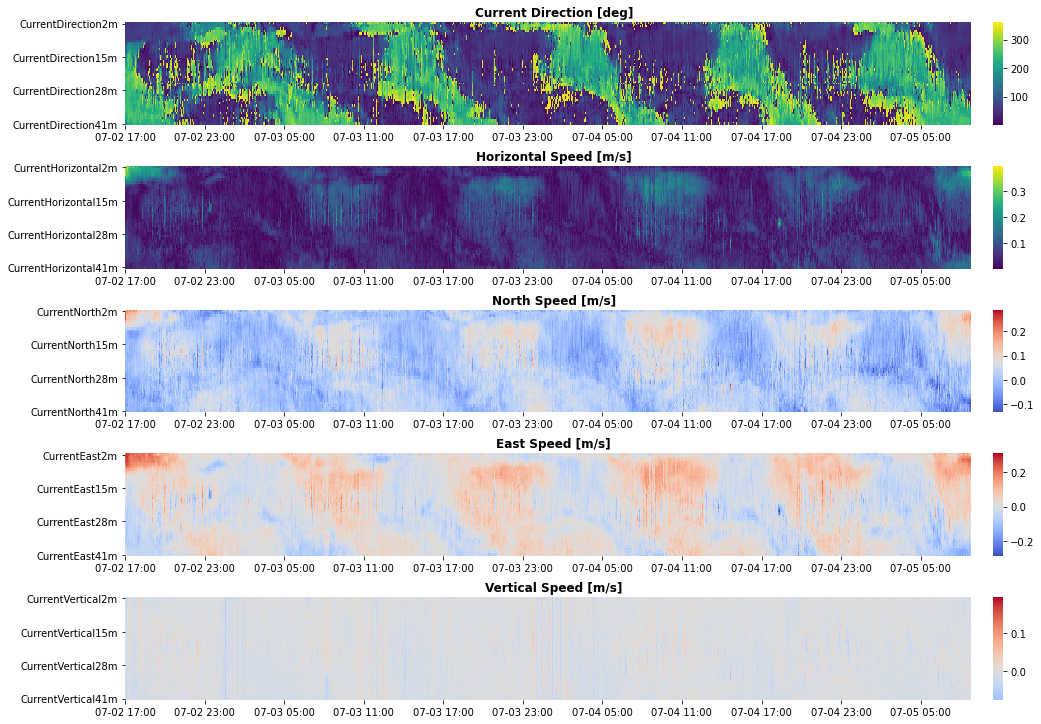

In [27]:
# TODO: Fix axis labels and ticks

fig, ax = plt.subplots(5,1,figsize=(15,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

#gs = gridspec.GridSpec(6,5)

ax[0].set_title('Current Direction [deg]', fontweight='bold')
ax[1].set_title('Horizontal Speed [m/s]', fontweight='bold')
ax[2].set_title('North Speed [m/s]', fontweight='bold')
ax[3].set_title('East Speed [m/s]', fontweight='bold')
ax[4].set_title('Vertical Speed [m/s]', fontweight='bold')

cutFrame = df[pd.Timestamp('2019-07-02 17:00:00'):]
cutFrame.index = cutFrame.index.strftime('%m-%d %H:%M')
currentDir = cutFrame.loc[:,'CurrentDirection2m':'CurrentDirection41m'].transpose()
currentHori = cutFrame.loc[:,'CurrentHorizontal2m':'CurrentHorizontal41m'].transpose()
currentVert = cutFrame.loc[:,'CurrentVertical2m':'CurrentVertical41m'].transpose()
currentNorth = cutFrame.loc[:,'CurrentNorth2m':'CurrentNorth41m'].transpose()
currentEast = cutFrame.loc[:,'CurrentEast2m':'CurrentEast41m'].transpose()
tideLvl = cutFrame.loc[:,'TideLevel'].dropna().transpose()

sb.heatmap(currentDir, xticklabels=360, yticklabels = 13, cmap='viridis', ax=ax[0], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentHori, xticklabels=360, yticklabels = 13, cmap='viridis', ax=ax[1], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentNorth, xticklabels=360, yticklabels = 13, cmap='coolwarm', ax=ax[2], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentEast, xticklabels=360, yticklabels = 13, cmap='coolwarm', ax=ax[3], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentVert, xticklabels=360, yticklabels = 13, cmap='coolwarm', ax=ax[4], center = 0.00, cbar_kws=dict(pad=0.01, aspect=10))

# TODO fix tide plot
#tideLvl.plot(ax=ax[5])
#ax[5].margins(0.0, 0.1)

for axis in ax:
    axis.xaxis.label.set_visible(False)
    #axis.set_xticklabels(df.index.astype('string')[2::360])
    #axis.yaxis.set_label('Depth')

## Center oxygen measurements

### Temperature

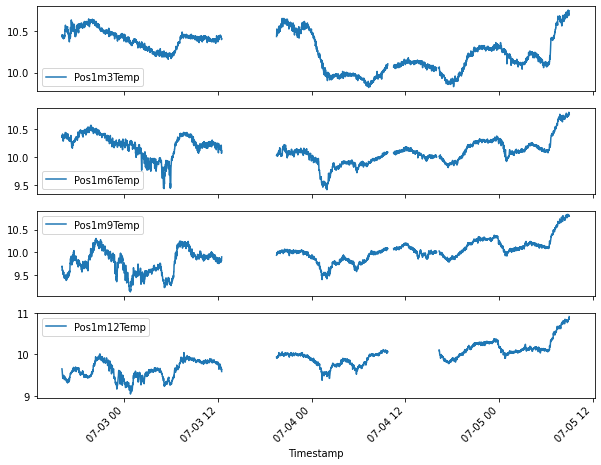

In [14]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True)

### Mean plot

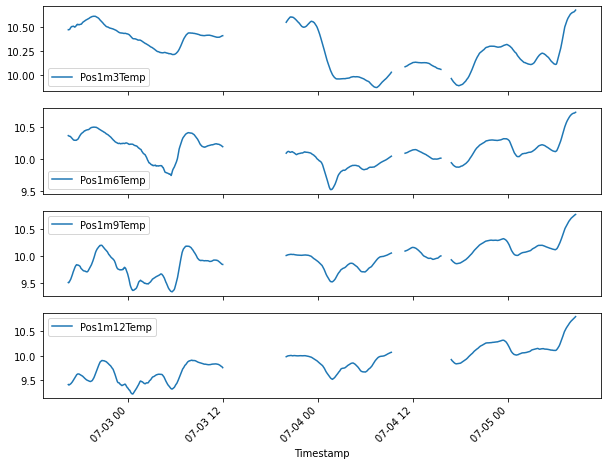

In [33]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].rolling(window = 60, center=True).mean().plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True)
    # .resample('H').mean()

### Remove trend with differencing

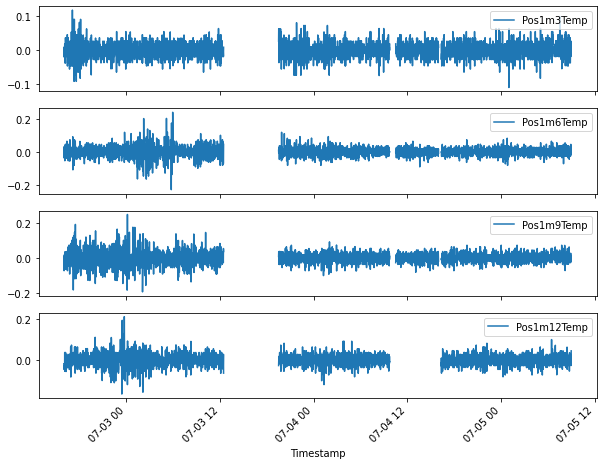

In [35]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].diff().plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True)

## Temperature measurements

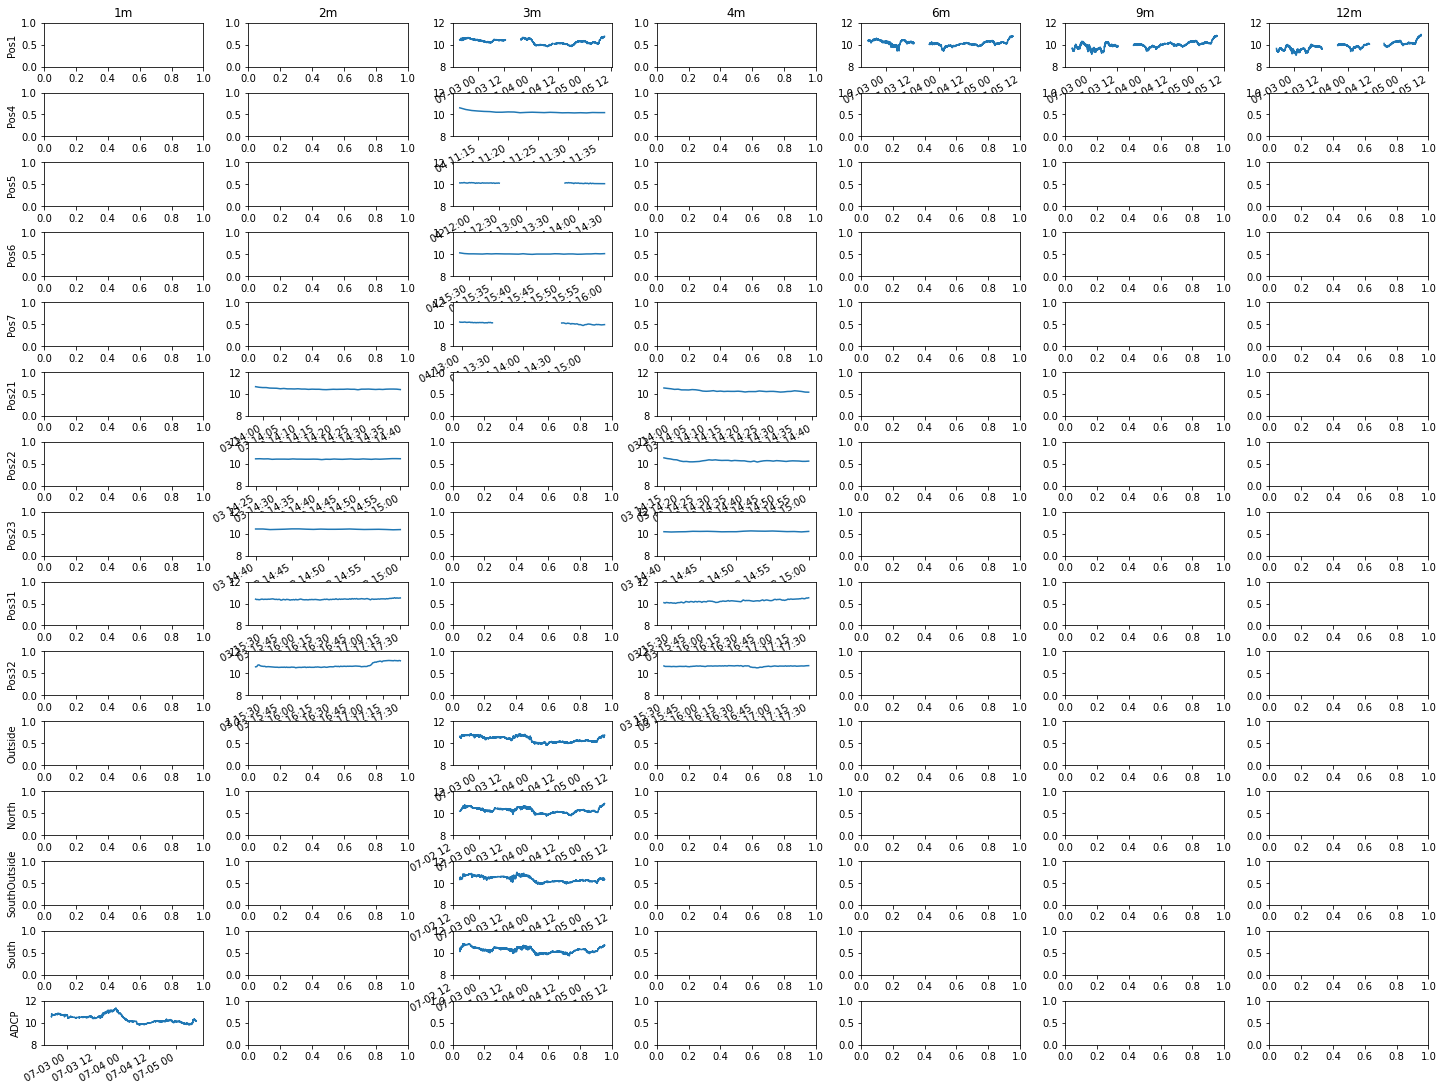

In [16]:
tempColumns = [col for col in df.columns if 'Temp' in col]
positions = []
depths = [1, 2, 3, 4, 6, 9, 12]

fig, axes = plt.subplots(15,len(depths), figsize=(20,18))
fig.tight_layout()

for key, col in enumerate(tempColumns):
    depth = int(re.search('m\d+', col).group()[1:])  # Get sensor depth
    pos = col[0:re.search('m\d+', col).start()]      # Get sensor position

    if pos not in positions:   # Slow, switch to dict later maybe
        positions.append(pos)

    df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(8,12))


for key, ax in enumerate(axes[0]):
    ax.set_title(str(depths[key]) + 'm')
    #plt.xticks(rotation=45)
    
for key, ax in enumerate(axes[:,0]):
    ax.set_ylabel(positions[key])
    ax.xaxis.label.set_visible(False)

# TODO: Remove Pos 22 temp measurements?

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>], dtype=object)

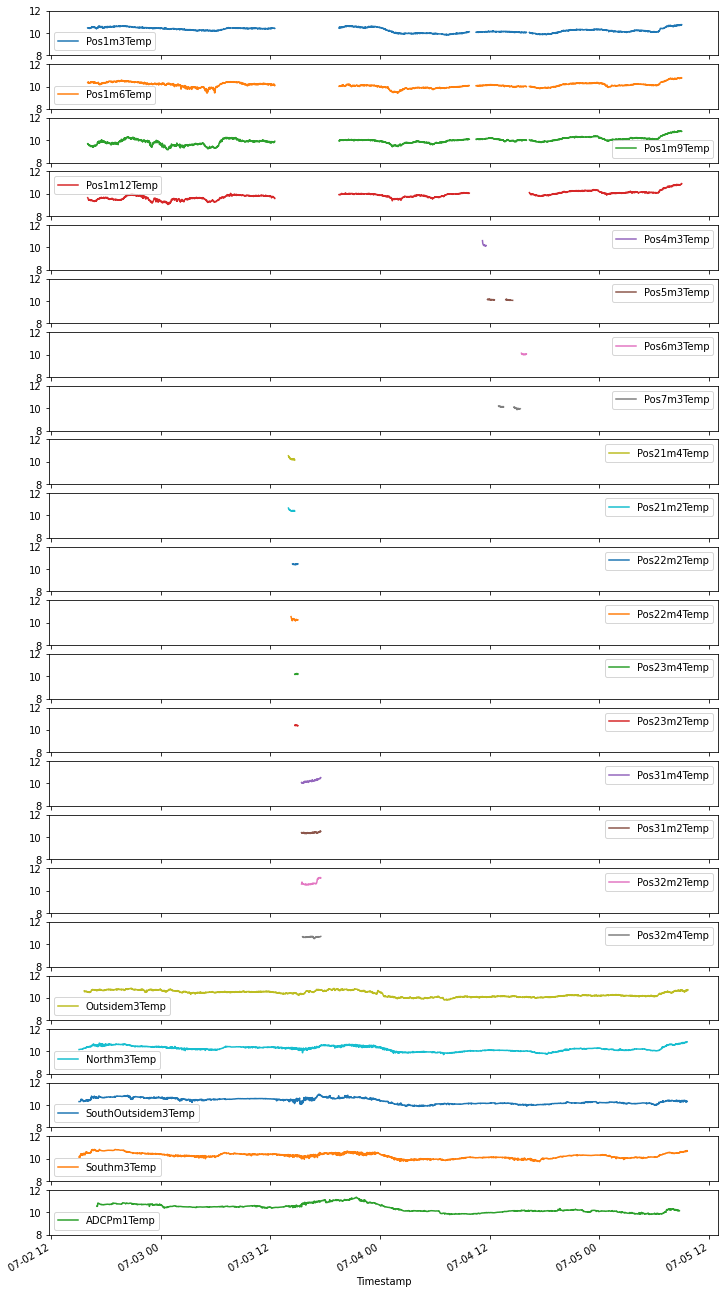

In [38]:
df.loc[:,tempColumns].plot(subplots=True, figsize=(12,25), ylim=(8,12))

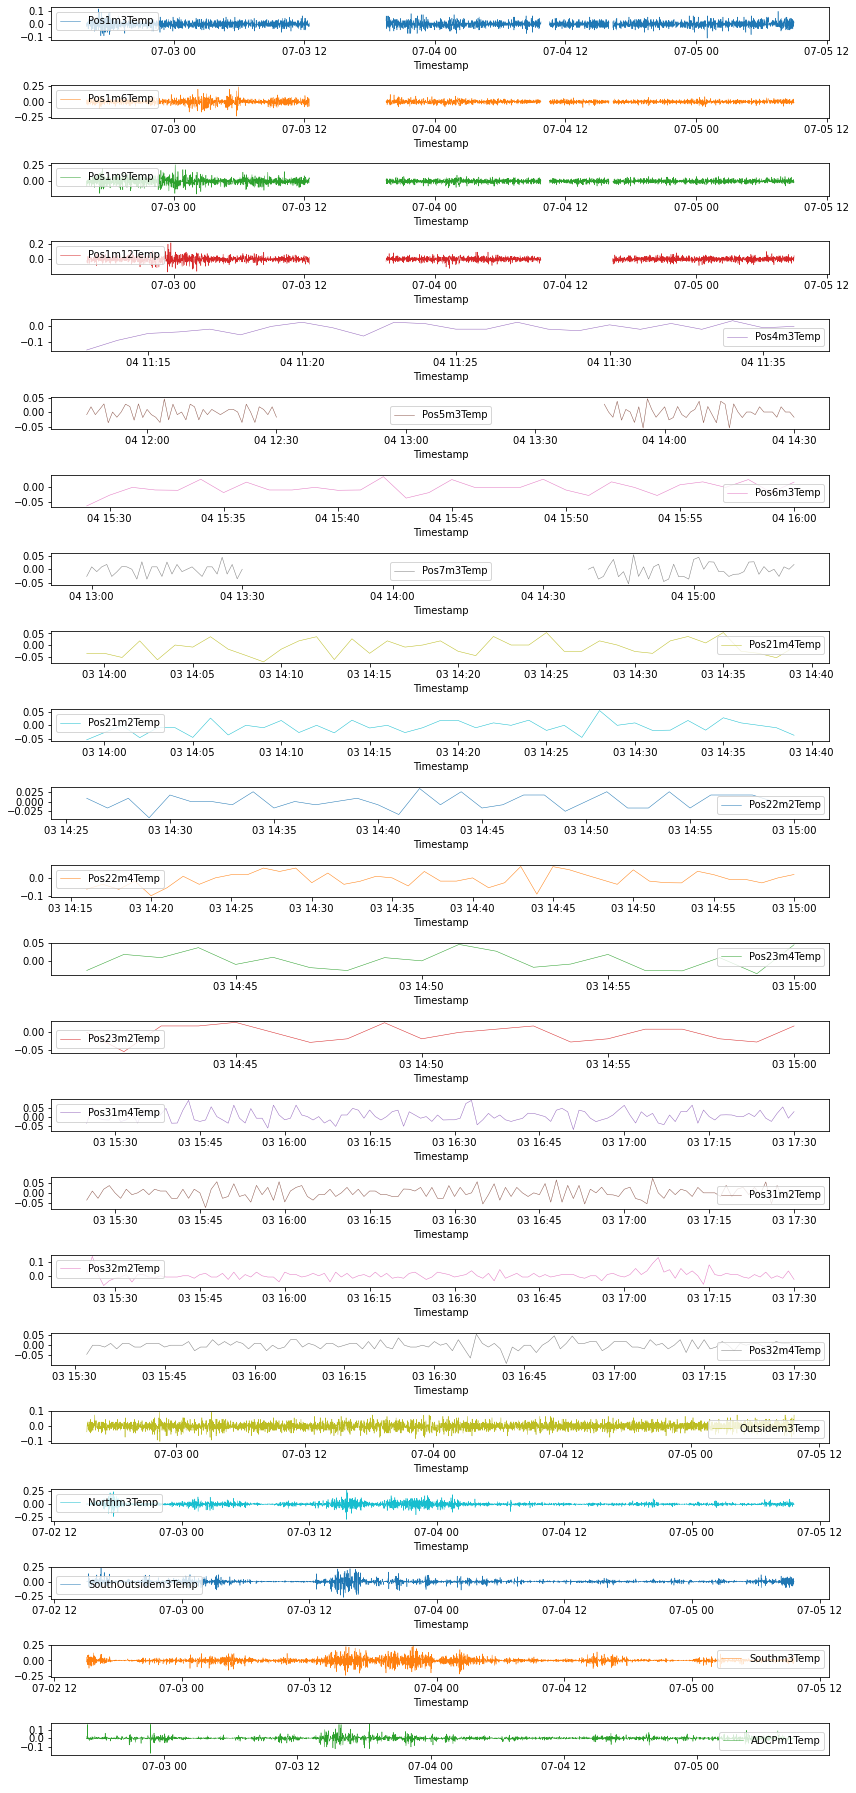

In [50]:
df.loc[:,tempColumns].diff().plot(subplots=True, figsize=(12,30), linewidth=0.5, sharex=False)
plt.tight_layout()

## Note on Temperature measurement intervals

Moving of sensors cause the temperature to be too high at the start of measurements. This is a problem for positions that were only measured at for a very short time. See position 22 for example.

# DO measurements

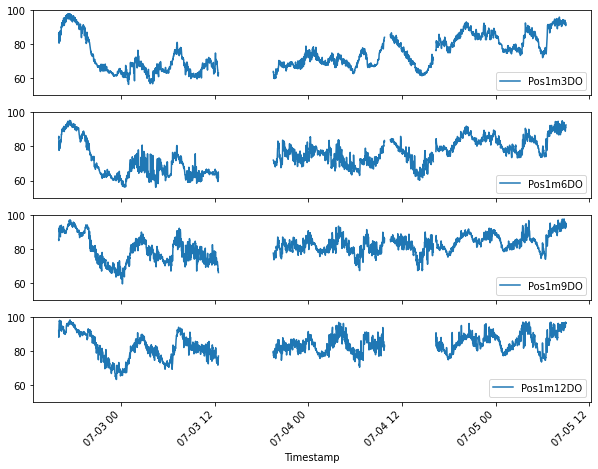

In [18]:
fig, ax = plt.subplots(4,1)
for key, i in enumerate(range(3,13,3)):
    #df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(50, 110))
    df.loc[:,'Pos1m' + str(i) + 'DO'].plot(ax=ax[key], rot = 45, legend=True, figsize=(10,8), sharex=True, sharey=True, ylim=(50,100))

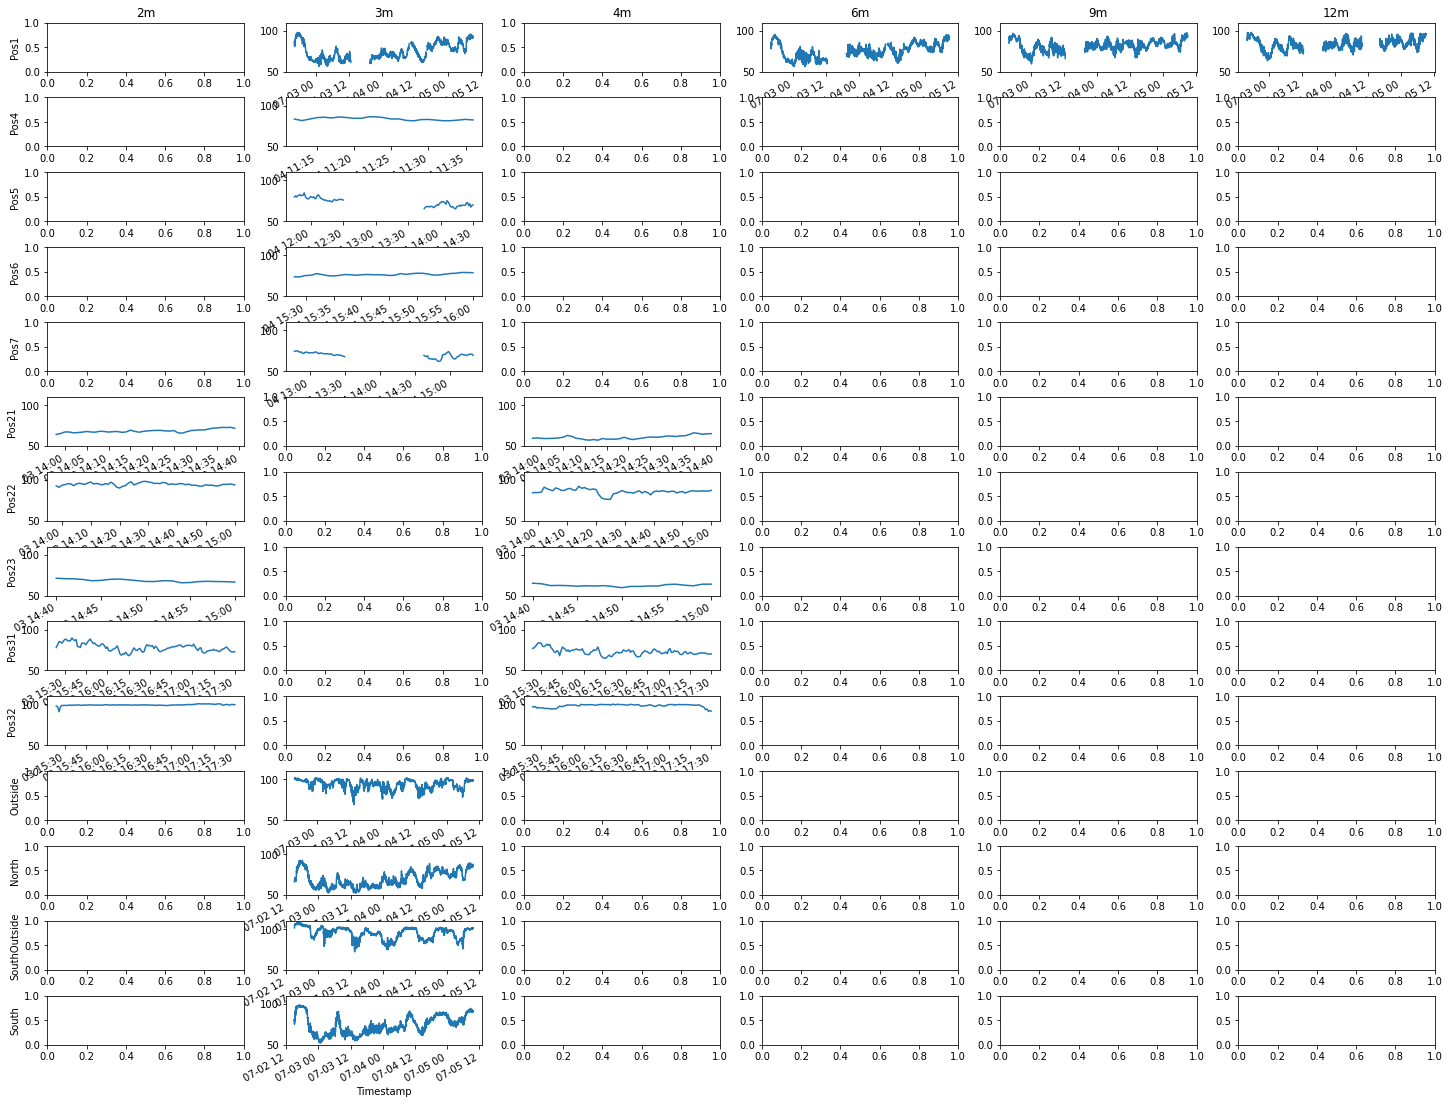

In [19]:
DOcolumns = [col for col in df.columns if 'DO' in col]
positions = []
depths = [2, 3, 4, 6, 9, 12]

fig, axes = plt.subplots(14,len(depths), figsize=(20,18))
fig.tight_layout()

for key, col in enumerate(DOcolumns):
    depth = int(re.search('m\d+', col).group()[1:])  # Get sensor depth
    pos = col[0:re.search('m\d+', col).start()]      # Get sensor position

    if pos not in positions:   # Slow, switch to dict later maybe
        positions.append(pos)

    df.loc[:,col].plot(ax=axes[positions.index(pos), depths.index(depth)], ylim=(50, 110))


for key, ax in enumerate(axes[0]):
    ax.set_title(str(depths[key]) + 'm')
    #plt.xticks(rotation=45)
    
for key, ax in enumerate(axes[:,0]):
    ax.set_ylabel(positions[key])
    ax.xaxis.label.set_visible(False)

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

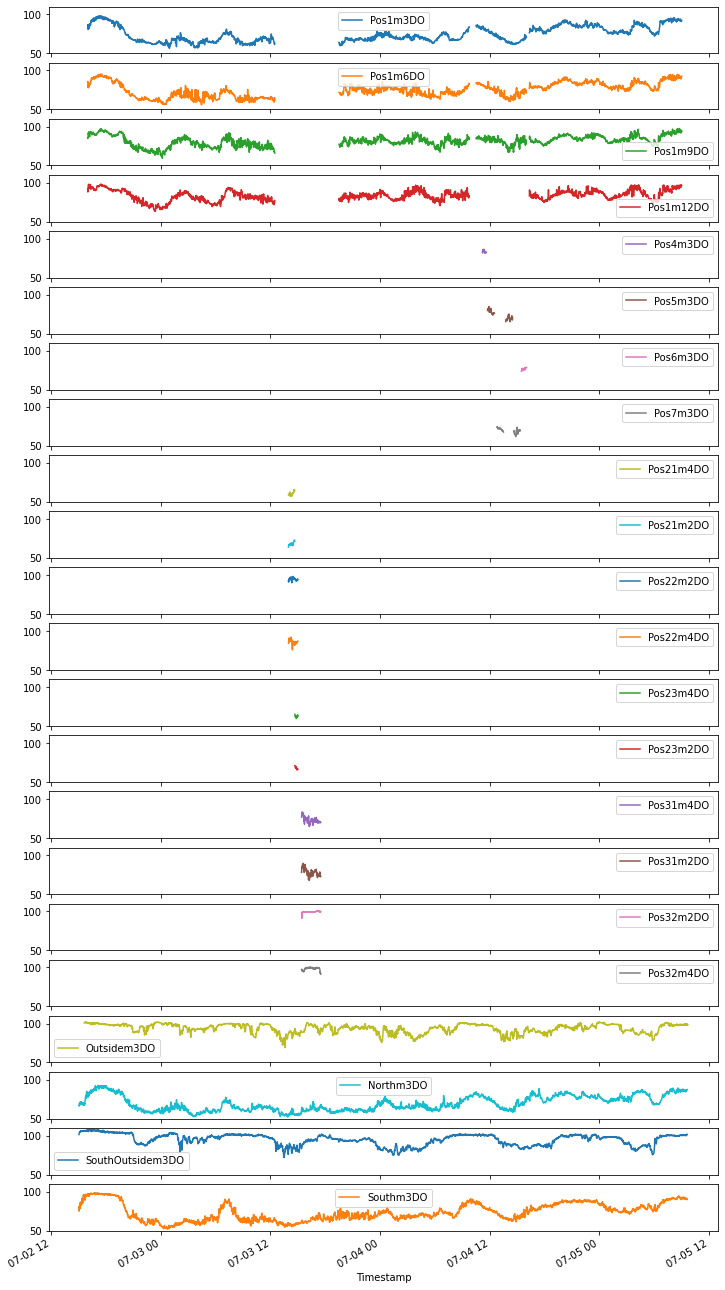

In [40]:
df.loc[:,DOcolumns].plot(subplots=True, figsize=(12,25), ylim=(50, 110))

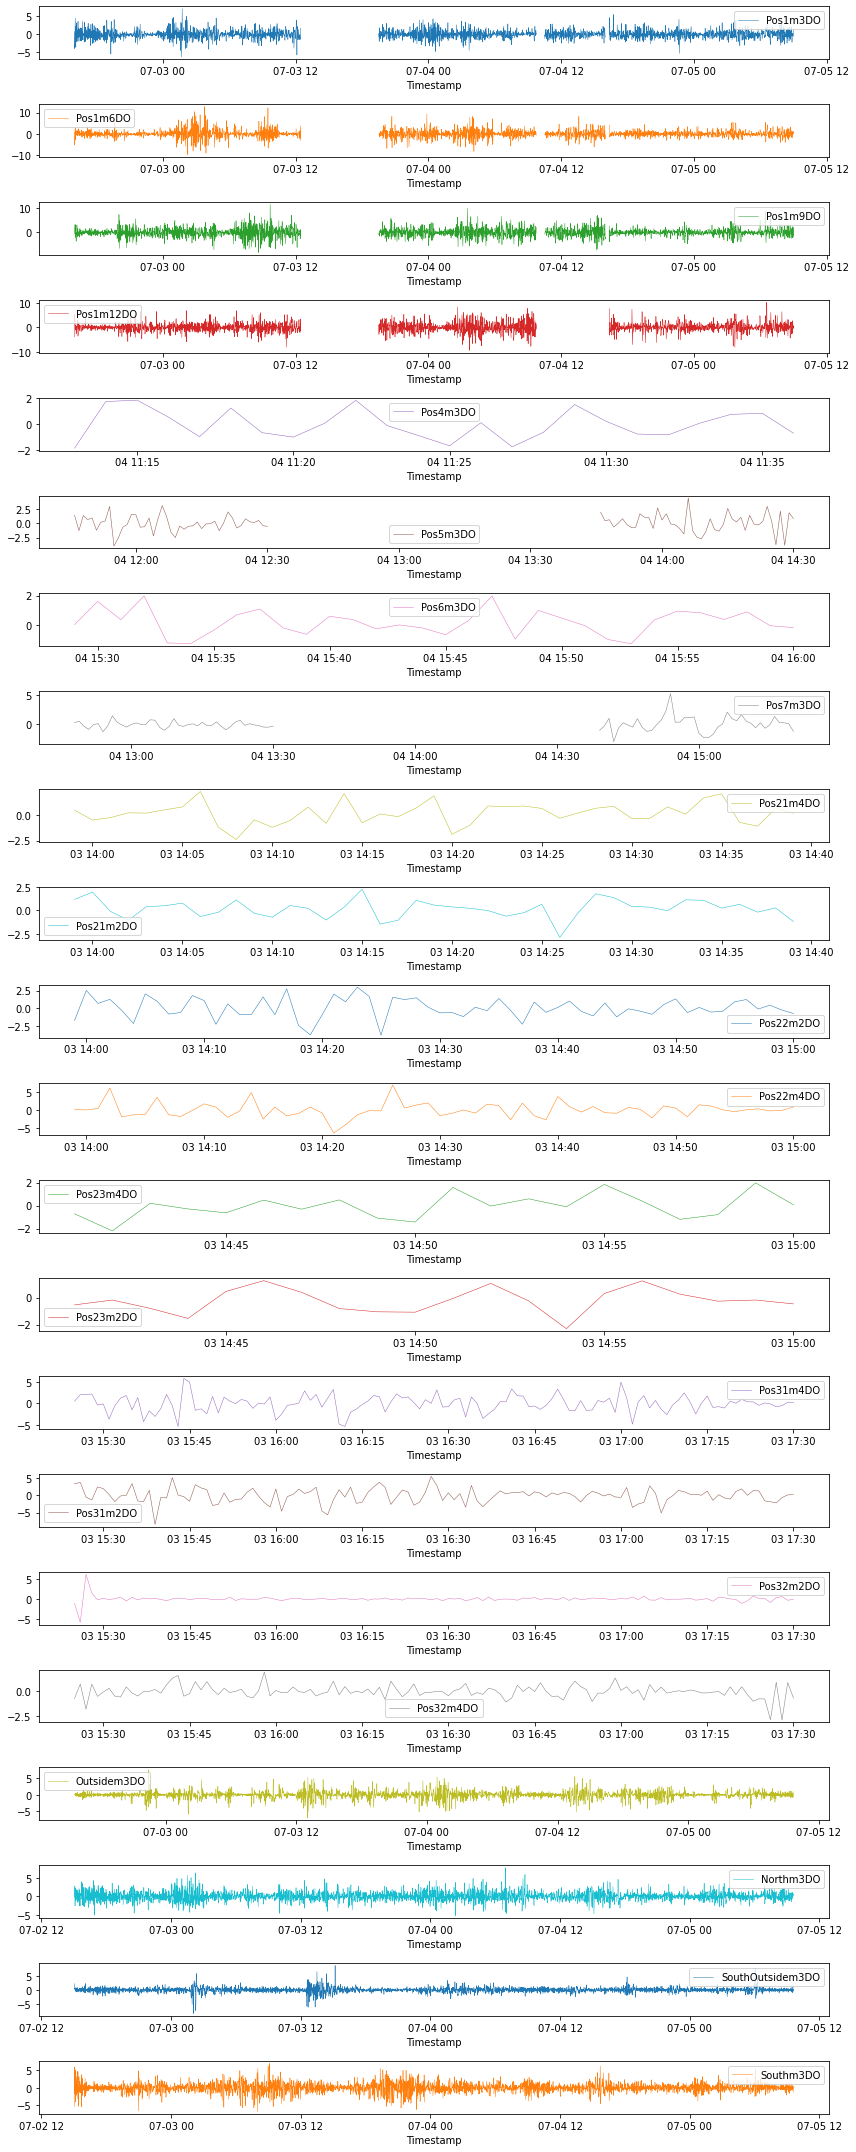

In [51]:
df.loc[:,DOcolumns].diff().plot(subplots=True, figsize=(12,30), linewidth=0.5, sharex=False)
plt.tight_layout()

In [62]:
x = mdates.date2num(df.index)
z4 = np.polyfit(x,df['Southm3DO'].dropna(), 3)

TypeError: expected x and y to have same length